In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties


In [2]:
X_svd = np.loadtxt('../dataset/X_svd.txt', delimiter=',')
X_svd_3 = np.loadtxt('../dataset/X_svd_3.txt', delimiter=',')

## OCSVM

In [3]:
X_train, X_test = train_test_split(X_svd_3, test_size=0.33, random_state=42)

In [4]:
for i in xrange(3):
    print X_train[i, 0], X_train[i, 1], X_train[i, 2]

-0.16585196278 0.0480424893474 -0.000188663980978
0.26129931165 0.00543058259059 0.00348280378162
31.5090564971 -0.131524142524 -0.0285729718487


In [5]:
for i in xrange(3):
    print X_test[i, 0], X_test[i, 1], X_test[i, 2]

-0.220898530482 3.00149478248 -0.302043977228
0.536583810004 2.63746912268 0.373900393335
33.8020228141 -0.994195495255 0.167978728252


In [6]:
# fit the model
clf = svm.OneClassSVM(nu=0.02, kernel="rbf", gamma=0.1, cache_size=1000)
clf.fit(X_train)

OneClassSVM(cache_size=1000, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.02, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [7]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
n_error_train = y_pred_train[y_pred_train == -1].size
print len(y_pred_train)
print n_error_train
n_error_test = y_pred_test[y_pred_test == -1].size
print len(y_pred_test)
print n_error_test

33500
659
16500
281


In [8]:
X_outliers = np.array(np.zeros(shape=(len(X_test),3)))
anomalyIndex = []
for i in xrange(len(y_pred_test)):
    if y_pred_test[i] == -1:
        temp = []
        anomalyIndex.append(i)
        for j in xrange(3):
            temp.append(X_test[i, j])
        X_outliers[i] = temp

In [9]:
with open('../anomalies/OCSVM.txt', 'w') as f:
    temp = []
    for line in anomalyIndex:
        temp = str(line) + "\n"
        f.write(temp)

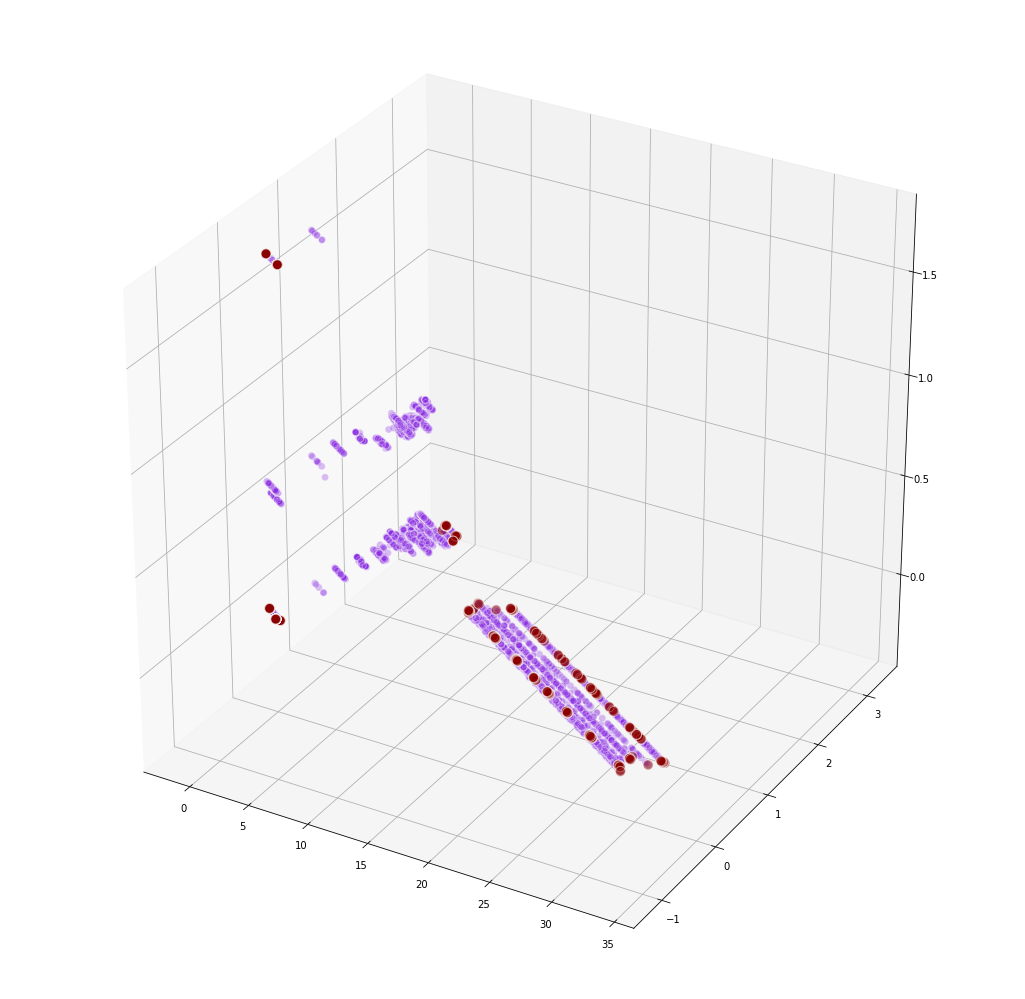

In [10]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

#b1 = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='green', alpha=0.1, edgecolor='w', s=15)
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='blueviolet', alpha=0.3, edgecolor='w', s=50)
b3 = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], X_outliers[:, 2], c='darkred', alpha=0.5, edgecolor='w', s=100)
    
plt.axis('tight')
#plt.legend([b1, b2],["learned frontier", "training observations", "new regular observations"], loc="upper left", prop=FontProperties(size=11))
plt.show()